(distr-coniugate-2-notebook)=
# Distribuzioni coniugate (2)

La statistica bayesiana ci permette di aggiornare le nostre credenze iniziali o conoscenze a priori sulla distribuzione di un parametro (in questo caso, la media della popolazione) in base ai dati osservati. Questo processo di aggiornamento ci porta a ottenere una distribuzione a posteriori che riflette una nuova comprensione del parametro, integrata con le informazioni fornite dal campione.

Il concetto fondamentale è che, attraverso l'aggiornamento bayesiano, l'incertezza sulla stima del parametro si riduce. Questo è dovuto al fatto che l'informazione aggiuntiva fornita dai dati osservati consente di "restringere" la distribuzione a posteriori rispetto alla distribuzione a priori, riducendo così la varianza (o deviazione standard) della distribuzione del parametro di interesse.

In questo capitolo, approfondiremo il tema delle {ref}`distr-coniugate-1-notebook`, focalizzandoci sul modello normale-normale. Una caratteristica distintiva di questo modello è la sua capacità di auto-coniugazione rispetto a una funzione di verosimiglianza gaussiana. In termini più semplici, se la funzione di verosimiglianza segue una distribuzione gaussiana, l'adozione di una distribuzione a priori gaussiana per la media garantisce che anche la distribuzione a posteriori mantenga la sua forma gaussiana.

## Preparazione del Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import arviz as az

In [2]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "distribuzioni_coniugate_1"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

az.style.use("arviz-darkgrid")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%config InlineBackend.figure_format = "retina"

## Derivazione Analitica della Distribuzione a Posteriori in un Contesto Normale con Varianza Nota

Esaminiamo un insieme di dati $y = [Y_1, \ldots, Y_n]$, che consiste in $n$ osservazioni indipendenti e identicamente distribuite secondo una distribuzione normale $\mathcal{N}(\mu, \sigma)$, dove $\sigma$ è un valore già noto. L'obiettivo è stimare il parametro $\mu$, utilizzando un approccio Bayesiano. Per fare ciò, adottiamo una distribuzione a priori per $\mu$ che è anch'essa una distribuzione normale. Questo tipo di modello è conosciuto come "normale-normale coniugato".

La funzione di verosimiglianza $p(y \mid \mu, \sigma)$ per un insieme di dati indipendenti è data dalla distribuzione normale. Specificamente, definiamo la densità a priori $p(\mu)$ per $\mu$ come una distribuzione normale con media $\mu_0$ e varianza $\sigma_0^2$.

Il nostro obiettivo è calcolare la distribuzione a posteriori $p(\mu \mid y)$. La funzione di densità congiunta delle osservazioni $Y_1, \ldots, Y_n$, assumendo che sono indipendenti, si scrive come il prodotto delle loro densità individuali:

$$
p(y \mid \mu) = \prod_{i=1}^n \frac{1}{{\sigma \sqrt {2\pi}}}\exp\left(-\frac{(y_i - \mu)^2}{2\sigma^2}\right).
$$

Analogamente, la densità a priori per $\mu$ è espressa con la seguente formula:

$$
p(\mu) = \frac{1}{{\sigma_0 \sqrt {2\pi}}}\exp\left(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\right).
$$

Con queste distribuzioni, la distribuzione a posteriori di $\mu$ risulta essere ancora una distribuzione normale:

$$
p(\mu \mid y) = \frac{1}{{\sigma_p \sqrt {2\pi}}}\exp\left(-\frac{(\mu - \mu_p)^2}{2\sigma_p^2}\right),
$$

dove la media a posteriori $\mu_p$ e la varianza a posteriori $\sigma_p^2$ vengono calcolate usando le seguenti formule:

$$
\mu_p = \frac{\frac{1}{\sigma_0^2}\mu_0 + \frac{n}{\sigma^2}\bar{y}}{\frac {1}{\sigma_0^2} + \frac{n}{\sigma^2}}
$$ (eq-post-norm-mup)

$$
\sigma_p^2 = \frac{1}{\frac {1}{\sigma_0^2}+ \frac{n}{\sigma^2}}.
$$ (eq-post-norm-taup2)

- La media a posteriori $ \mu_p $ rappresenta una combinazione ponderata tra la media a priori $ \mu_0 $ e la media campionaria $ \bar{y} $. Il peso di $ \bar{y} $ aumenta con il numero di osservazioni $ n $ e diminuisce all'aumentare dell'incertezza a priori $ \sigma_0^2 $.

- La varianza a posteriori $ \sigma_p^2 $ è inferiore all'incertezza a priori $ \sigma_0^2 $ e diminuisce con l'aumento del numero di osservazioni $ n $.

Questo approccio Bayesiano ci permette di aggiornare la nostra conoscenza su $\mu$ incorporando le informazioni provenienti dalle osservazioni.

## Un esempio concreto

Supponiamo di esaminare i punteggi BDI-II (un indice di depressione) di un gruppo di soggetti clinici {cite:p}`zetsche_2019future`. Da questi dati, vogliamo aggiornare le nostre conoscenze sulla media della popolazione di questi punteggi.

Per illustrare come l'incertezza si riduca passando dalla conoscenza a priori a quella a posteriori, consideriamo:

- Una distribuzione a priori per la media dei punteggi con una media (μ0) di 30 e una deviazione standard (σ0) di 5, che riflette una certa incertezza iniziale sulla media della popolazione.
- I dati osservati, da cui calcoliamo la media campionaria ($\bar{y}$) e la deviazione standard del campione ($\hat{\sigma}$).

Utilizziamo questi dati per calcolare la media e la deviazione standard a posteriori, che riflettono la nostra conoscenza aggiornata e ridotta incertezza sulla media della popolazione.

In [3]:
# Dati osservati
y = np.array([26.0, 35.0, 30, 25, 44, 30, 33, 43, 22, 43, 24, 19, 39, 31, 25, 
              28, 35, 30, 26, 31, 41, 36, 26, 35, 33, 28, 27, 34, 27, 22])
y_bar = np.mean(y)
sigma = np.std(y, ddof=1)  # Uso ddof=1 per la deviazione standard campionaria
n = len(y)

In [8]:
# Distribuzione a priori
mu_0 = 29
sigma_0 = 5

In [9]:
# Calcolo della media e deviazione standard a posteriori
mu_post = (mu_0 / sigma_0**2 + n * y_bar / sigma**2) / (1 / sigma_0**2 + n / sigma**2)
sigma_post = np.sqrt(1 / (1 / sigma_0**2 + n / sigma**2))

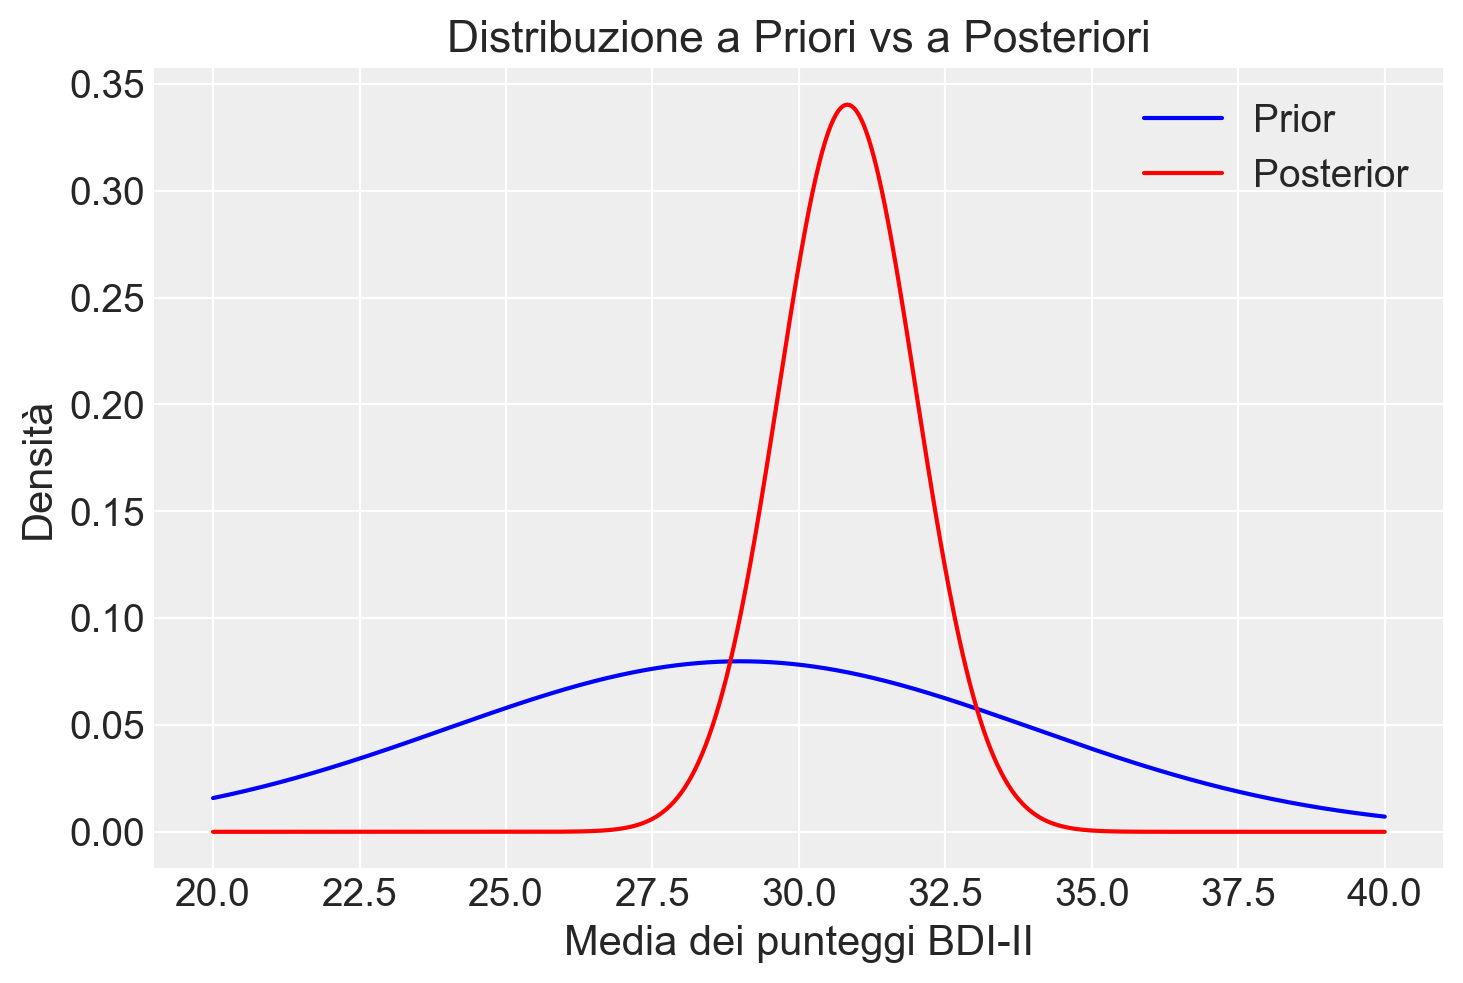

In [10]:
# Visualizzazione
x_axis = np.linspace(20, 40, 1000)
plt.plot(x_axis, stats.norm.pdf(x_axis, mu_0, sigma_0), label='Prior', color='blue')
plt.plot(x_axis, stats.norm.pdf(x_axis, mu_post, sigma_post), label='Posterior', color='red')
plt.xlabel('Media dei punteggi BDI-II')
plt.ylabel('Densità')
plt.title('Distribuzione a Priori vs a Posteriori')
_ = plt.legend()

In [11]:
print(f"Media a priori: {mu_0}, Deviazione standard a priori: {sigma_0}")
print(f"Media a posteriori: {mu_post:.2f}, Deviazione standard a posteriori: {sigma_post:.2f}")

Media a priori: 29, Deviazione standard a priori: 5
Media a posteriori: 30.83, Deviazione standard a posteriori: 1.17


Questo codice Python visualizza le distribuzioni a priori e a posteriori per la media dei punteggi BDI-II, evidenziando come l'informazione aggiunta dai dati riduca l'incertezza sulla media della popolazione, come dimostrato dalla riduzione della deviazione standard dalla distribuzione a priori a quella a posteriori. Il grafico risultante mostra chiaramente questo effetto: la curva a posteriori è più "stretta" rispetto alla curva a priori, indicando una minore incertezza nella stima della media dopo l'analisi dei dati. Questa riduzione dell'incertezza è uno dei benefici fondamentali dell'approccio bayesiano all'inferenza statistica.

## Commenti e considerazioni finali

In questa sezione, abbiamo approfondito il meccanismo dell'aggiornamento bayesiano attraverso l'implementazione del modello normale-normale. 

Il processo inizia definendo una distribuzione a priori per $ \mu $, specificata da una media $ \mu_0 $ e una varianza $ \sigma_0^2 $. Dopo l'acquisizione di nuovi dati, ipotizzando che seguano una distribuzione Normale con media campionaria $ \bar{y} $ e varianza nota $ \sigma^2 $, implementiamo il teorema normale-normale per derivare la distribuzione a posteriori del parametro.

La media della distribuzione a posteriori, denotata come $ \mu_{\text{post}} $, si configura come una media ponderata tra la media a priori $ \mu_0 $ e la media campionaria $ \bar{y} $, dove il peso assegnato a ciascuna media è determinato dalle rispettive varianze $ \sigma_0^2 $ e $ \sigma^2 $ della distribuzione a priori e dei dati osservati. Analogamente, la varianza a posteriori $ \sigma_{\text{post}}^2 $ è determinata utilizzando un'espressione che incorpora entrambe le varianze.

In sintesi, l'adozione del modello normale-normale in un contesto bayesiano facilita il calcolo delle distribuzioni a posteriori, grazie alla scelta di una distribuzione a priori Normale che mantiene la proprietà di coniugatezza, semplificando così l'intero processo analitico.

## Informazioni sull'Ambiente di Sviluppo

In [8]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sun Jun 02 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.24.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

arviz     : 0.18.0
matplotlib: 3.8.4
scipy     : 1.13.0
numpy     : 1.26.4

Watermark: 2.4.3

